     alpha   bw  cell_size convex_hull  convex_hull_buffer          kernel  \
0        1   50         20        True                   1    epanechnikov   
1        1   50         20        True                   1  distance_decay   
2        1   50         20        True                   1        triangle   
3        1   50         20        True                   1         uniform   
4        1   50         20        True                   1        gaussian   
5        1  200         20        True                   1    epanechnikov   
6        1  200         20        True                   1  distance_decay   
7        1  200         20        True                   1        triangle   
8        1  200         20        True                   1         uniform   
9        1  200         20        True                   1        gaussian   
10       1  350         20        True                   1    epanechnikov   
11       1  350         20        True                   1  dist

     alpha   bw  cell_size convex_hull  convex_hull_buffer  exposure  \
0        1   50         20        True                   1     0.133   
1        1   50         20        True                   1     0.134   
2        1   50         20        True                   1     0.134   
3        1   50         20        True                   1     0.131   
4        1   50         20        True                   1     0.736   
5        1  200         20        True                   1     0.238   
6        1  200         20        True                   1     0.235   
7        1  200         20        True                   1     0.235   
8        1  200         20        True                   1     0.251   
9        1  200         20        True                   1     0.655   
10       1  350         20        True                   1     0.372   
11       1  350         20        True                   1     0.373   
12       1  350         20        True                   1     0

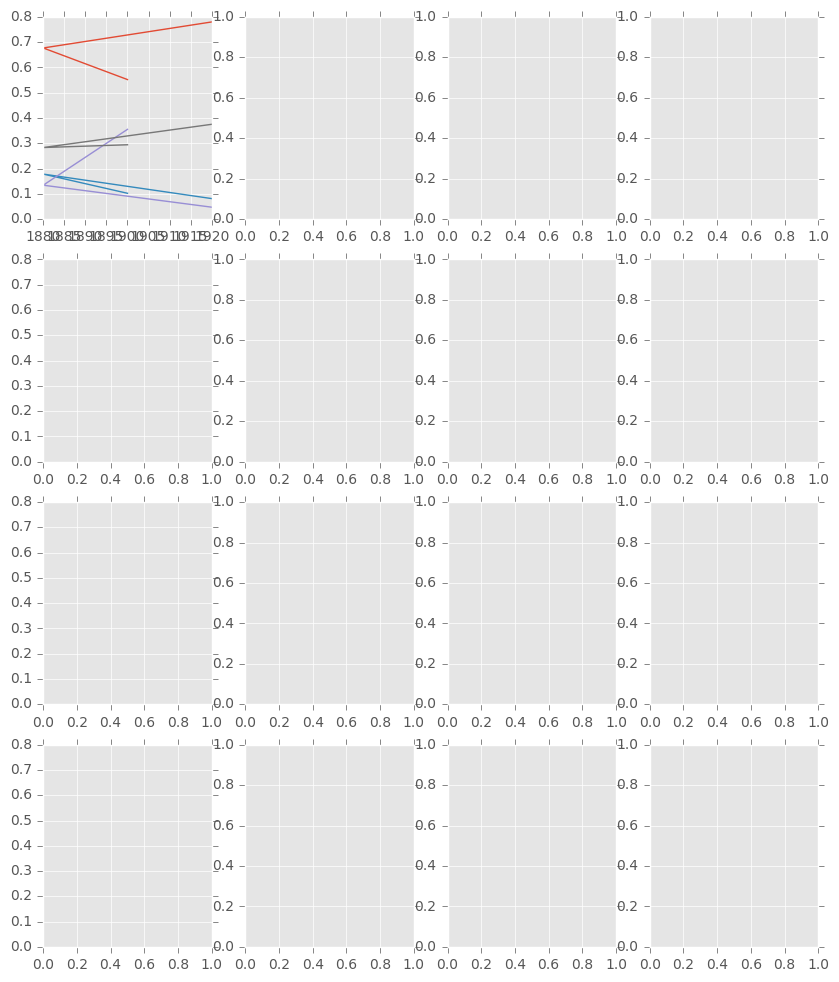

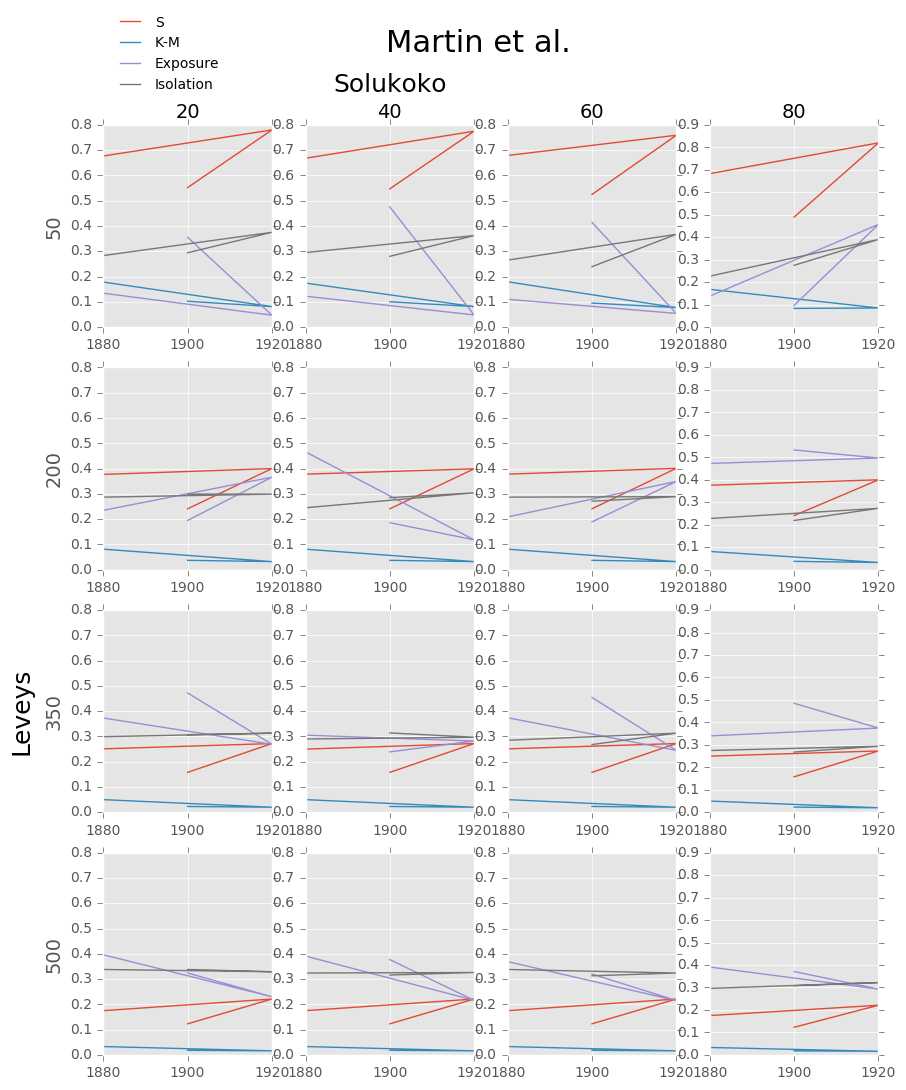

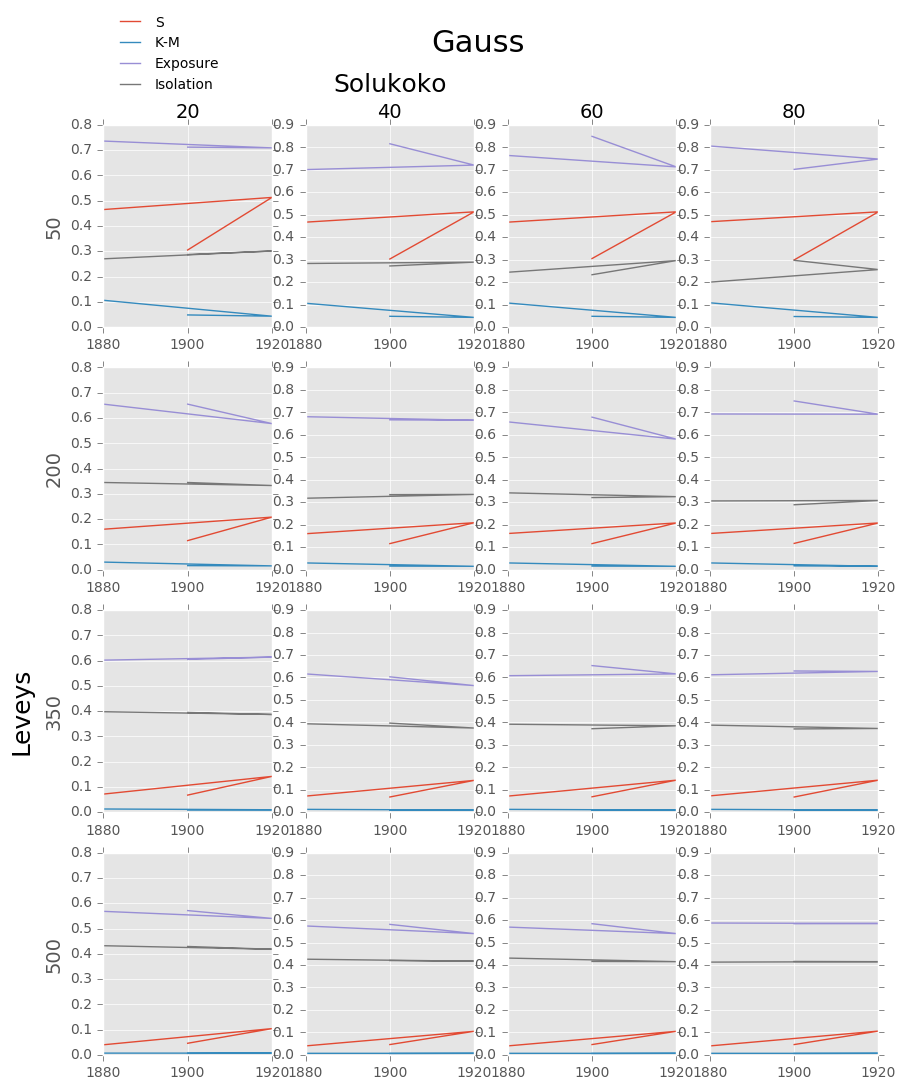

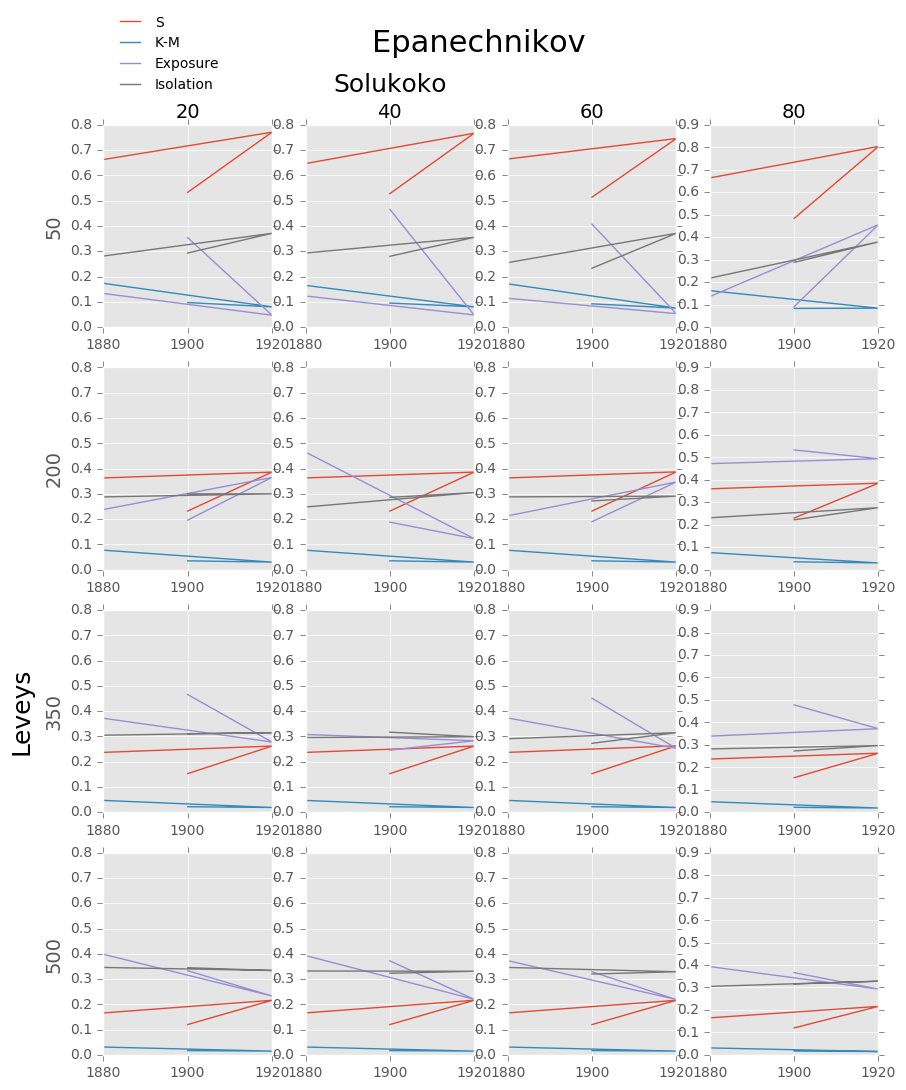

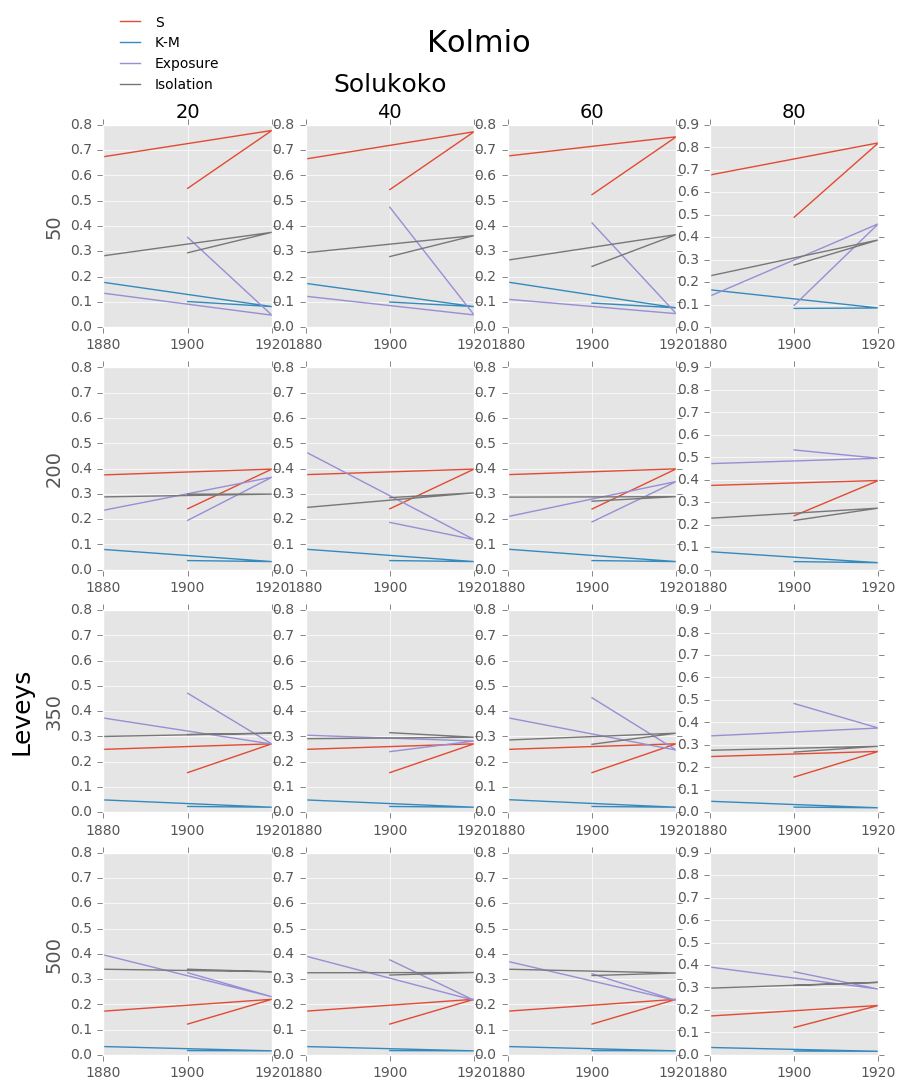

In [4]:
import io
import json

import requests
import pandas as pd
import matplotlib.pyplot as plt

from spatial_segregation import data, kde, analyses, plotting

DATA_DIR = 'https://raw.githubusercontent.com/AnttiHaerkoenen/spatial_segregation/master/data'

def get_text(file, data_dir=DATA_DIR):
    url = '{0}/{1}'.format(data_dir, file)
    s = requests.get(url).content
    text_io = io.StringIO(s.decode('utf-8'))
    return text_io

point_data = json.loads(get_text('points1878.geojson').getvalue())

v80 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1880.csv'))))
v00 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1900.csv'))))
v20 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1920.csv'))))

pop_data = {
    1880: v80,
    1900: v00,
    1920: v20
}   

cells = [i for i in range(20, 81, 20)]
bandwidths = [i for i in range(50, 501, 150)]

data = {year: data.add_coordinates(value, point_data, coordinates_to_meters=False)
        for year, value in pop_data.items()}

ana1 = analyses.SegregationSurfaceAnalyses(
    data_dict=data,
    cell_sizes=cells,
    kernels=[k for k in kde.KERNELS],
    bws=bandwidths
)
ana1.analyse()
# print(ana1.results)
# ana1.results.plot()
# plt.show()

ana2 = analyses.SegregationIndexAnalyses(
    data_dict=data,
    cell_sizes=cells,
    kernels=[k for k in kde.KERNELS],
    bws=bandwidths
)
ana2.analyse()
# print(ana2.results)
# ana2.results.plot()
# plt.show()

results = pd.merge(ana1.results, ana2.results)
results = results["year kernel bw cell_size s exposure isolation km".split()]
plt.style.use("ggplot")

ytimet = ["Martin et al.", "Gauss", "Epanechnikov", "Kolmio", "Laatikko"]
for i, index in enumerate("distance_decay gaussian epanechnikov triangle uniform".split()):
    plotting.plot_results_all(
        results,
        index,
        indices="s km exposure isolation".split(),
        title=ytimet[i],
        subplot_title_param=dict(bandwidth='leveys', cell_size='solukoko'),
        labels="S K-M Exposure Isolation".split()
    )
    plt.show()

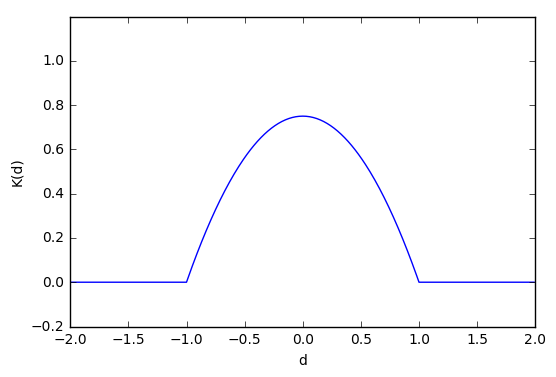

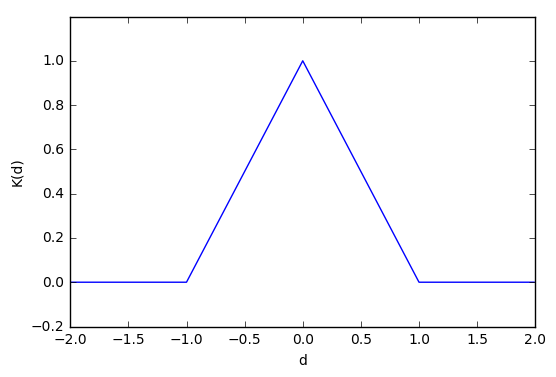

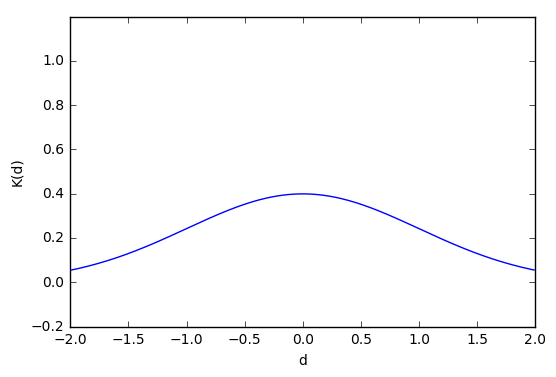

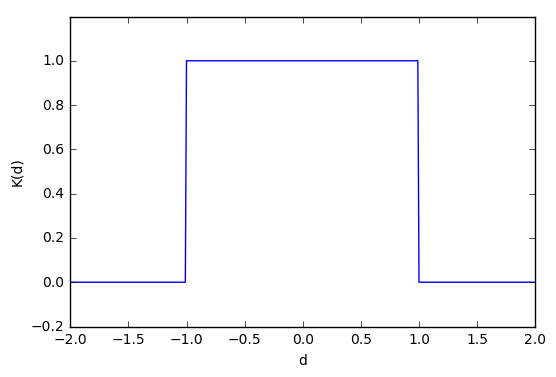

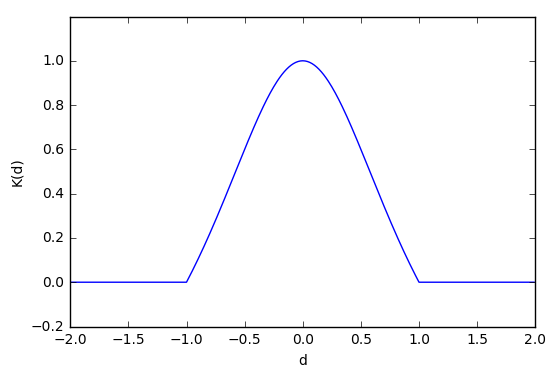

In [1]:
import matplotlib.pyplot as plt

from spatial_segregation import plotting, kde

for k, f in kde.KERNELS.items():
    plotting.plot_kernel(f)
    # plt.title(k.capitalize())
    plt.ylim((-0.2, 1.2))
    plt.ylabel("K(d)")
    plt.xlabel("d")
    plt.show()